# Numerical Solution of 2D Laplace equation using Finite Difference Method (Iterative Technique)

- https://youtu.be/DWCNVF9oMkw

- PDE: $\displaystyle \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$
- Domain: $x \in [0, a], y \in [0, b]$
- Boundary conditions: $\displaystyle u(x, 0) = 0, u(x, b)=\frac{\sin(\omega x)}{\sin(\omega a)}, u(0, y) = 0, u(a, y) = \frac{\sinh(\omega y)}{\sinh(\omega b)}$

**Analytical Solution**
$$
u(x, y) = \frac{\sin(\omega x)}{\sin(\omega a)}\frac{\sinh(\omega y)}{\sinh(\omega b)}
$$

$$
\left. \frac{\partial^2 u}{\partial x^2} \right|_i \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

$j \rightarrow x\text{-axis}$, $i \rightarrow y-\text{axis}$

$$
u(x, y) = u_{j,i}
$$

Then,

$$
\frac{u_{i, j+1} - 2u_{i,j} + u_{i, j-1}}{\Delta x^2} + \frac{u_{i+1, j} - 2u_{i,j} + u_{i-1, j}}{\Delta y^2} = 0
$$

We get

$$
u_{i,j} = \frac{\Delta x^2 (u_{i+1, j} + u_{i-1, j}) + \Delta y^2 (u_{i, j+1} + u_{i, j-1})}{2(\Delta x^2 + \Delta y^2)}
$$  

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Setup
a = 3*np.pi
b = np.pi
nx = 100
ny = 50
x = np.linspace(0, a, nx)
y = np.linspace(0, b, ny)

In [ ]:
# Analytical solution
u_true = np.zeros((ny, nx))
for i in range(ny):
    for j in range(nx):
        u_true[i,j] = (np.sin(x[j])/np.sin(a)) * (np.sinh(y[i])/np.sinh(b))
u_true.shape

(50, 100)

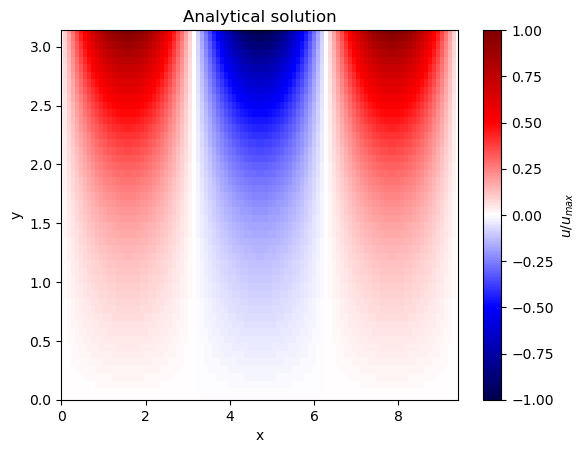

In [ ]:
nu_true = u_true/np.max(u_true)

fig = plt.figure()
ax = fig.add_subplot(111)
cf = ax.pcolormesh(x, y, nu_true, cmap='seismic')
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('$u/u_{max}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, a)
ax.set_ylim(0, b)
ax.set_title("Analytical solution")
plt.show()

In [ ]:
# Numerical solution
dx = x[1] - x[0]
dy = y[1] - y[0]
coeff = 1/(2*(dx**2 + dy**2))

# Initial guess
un = np.zeros((ny, nx))

# Boundary conditions
# y=0
un[0, :] = 0
# y=b
un[-1, :] = np.sin(x)/np.sin(a)
# x=0
un[:, 0] = 0
# x=a
un[:, -1] = np.sinh(y)/np.sinh(b)

iter_number = 1000
un_list = []
for _ in range(iter_number):
    for i in range(1, ny-1):
        for j in range(1, nx-1):
            un[i,j] = coeff * ((dx**2)*(un[i+1,j] + un[i-1,j]) + (dy**2)*(un[i,j+1] + un[i,j-1]))
    un_list.append(un.copy())
un_list[-1].shape

(50, 100)

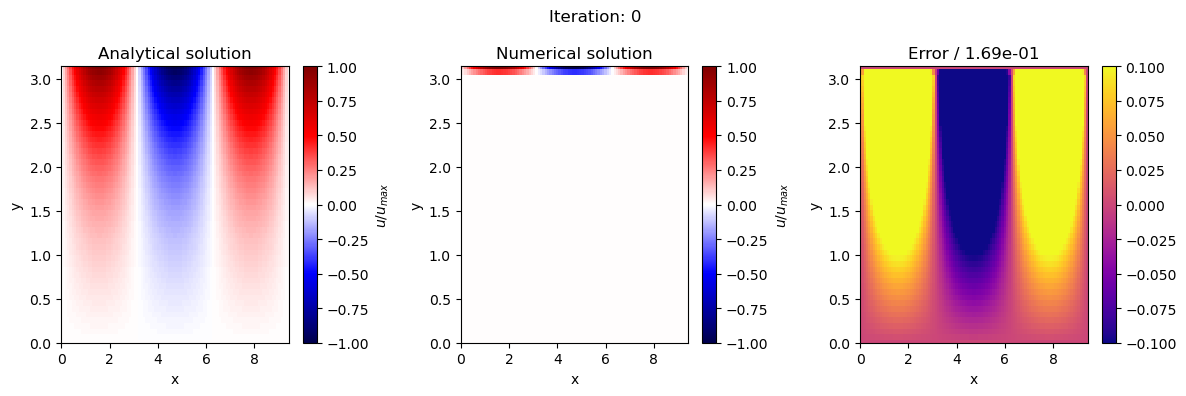

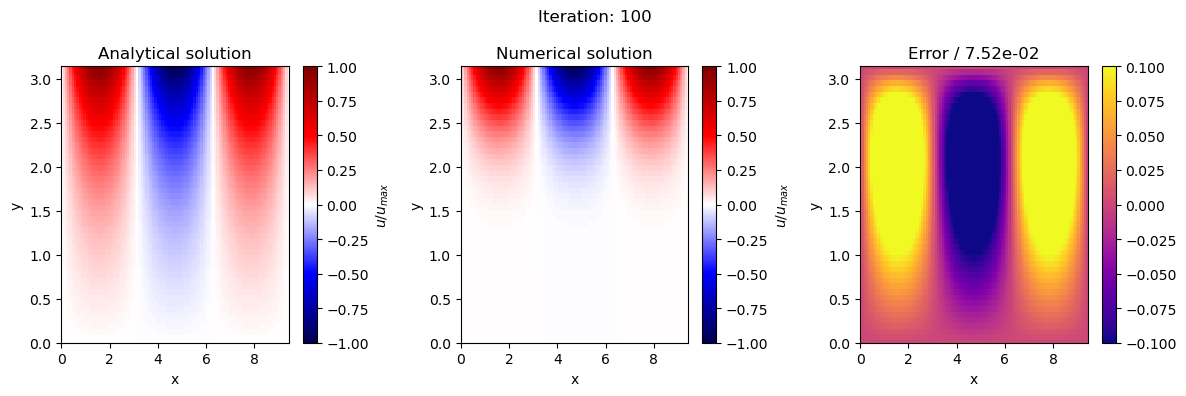

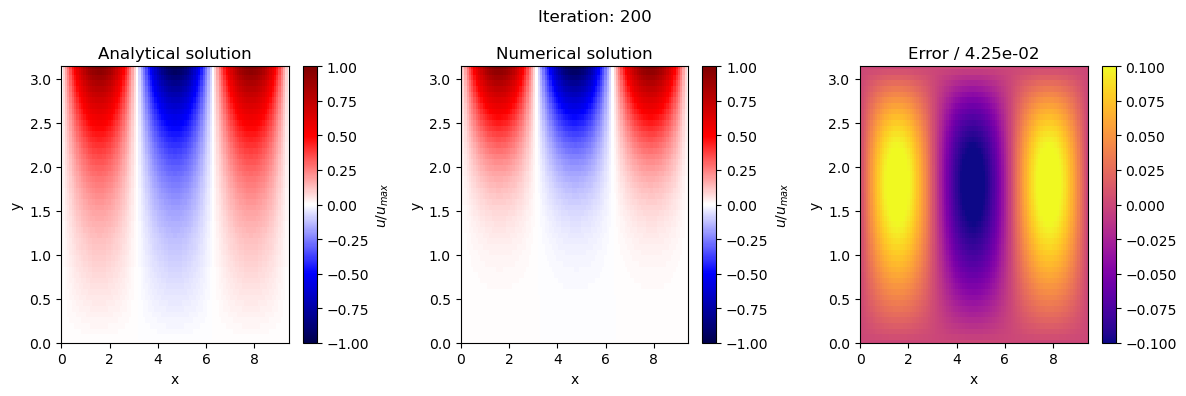

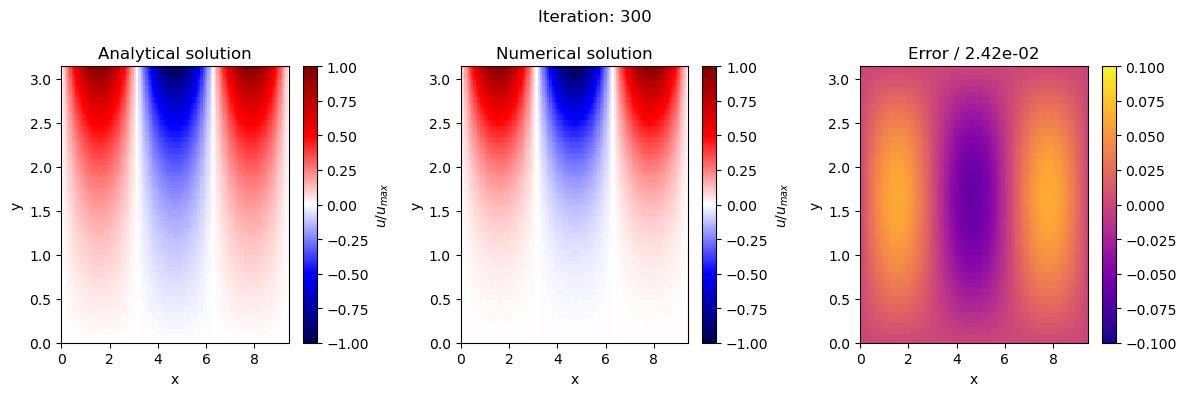

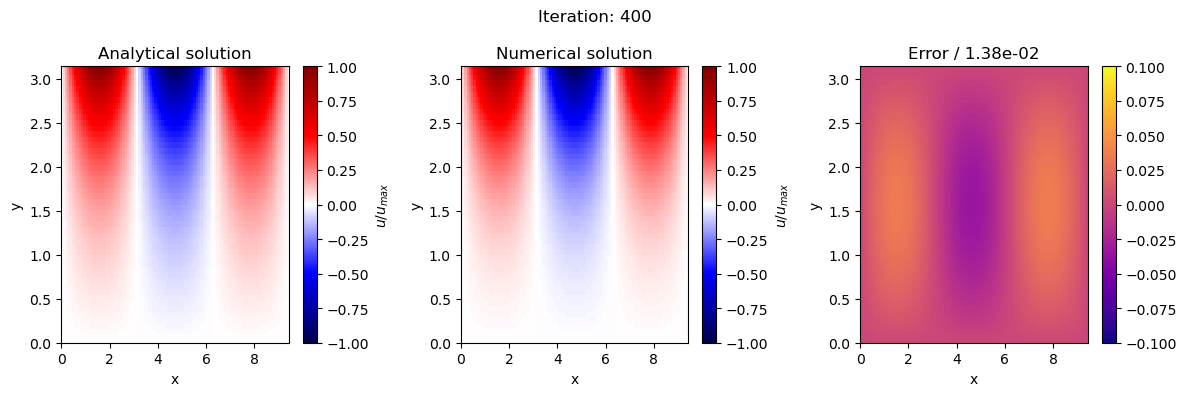

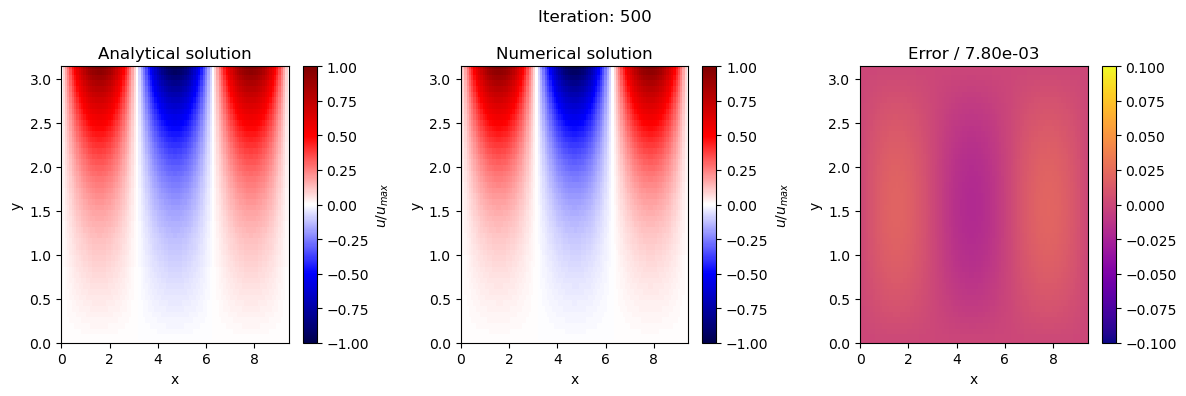

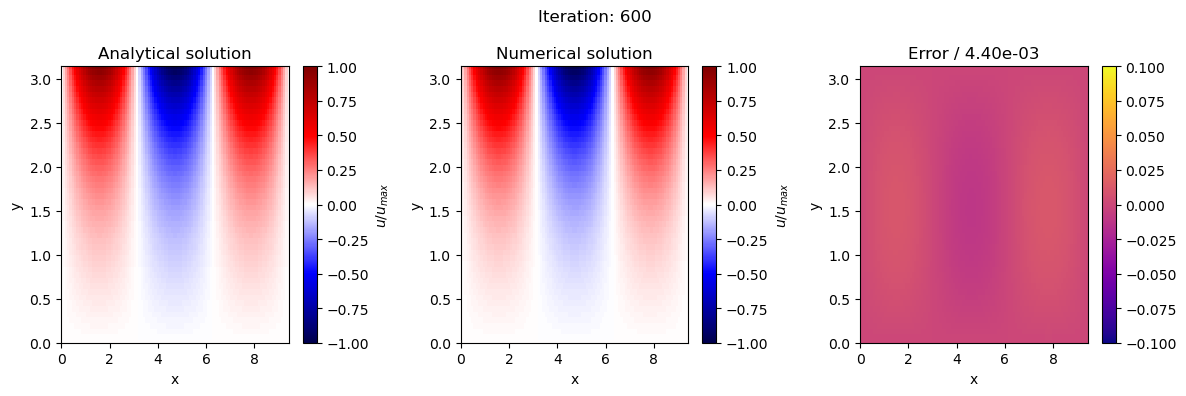

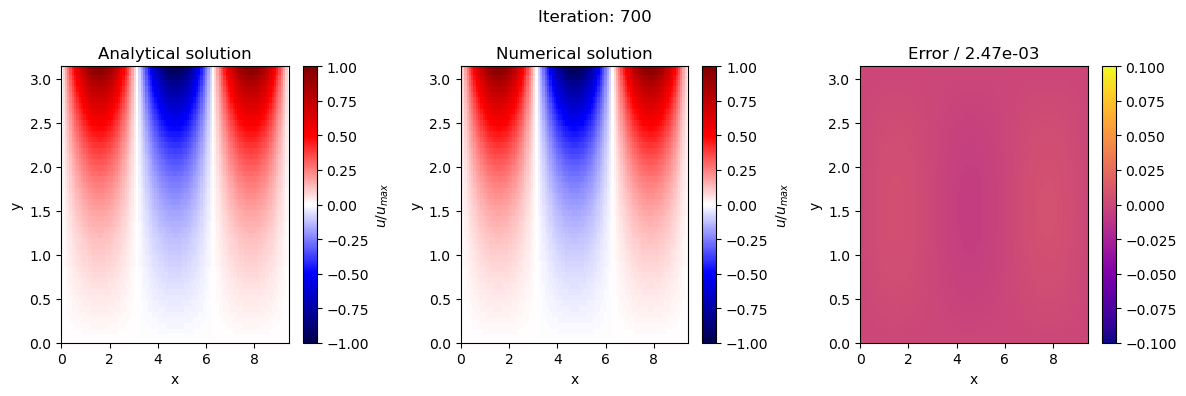

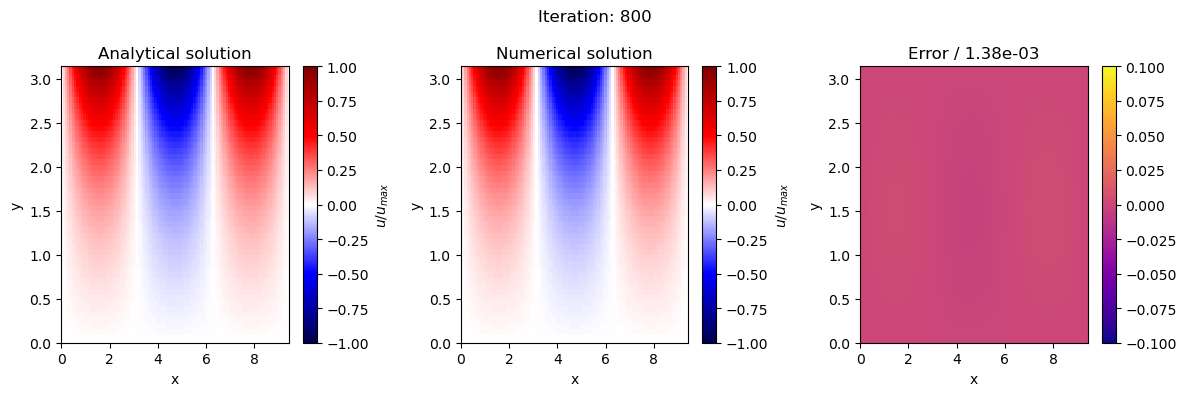

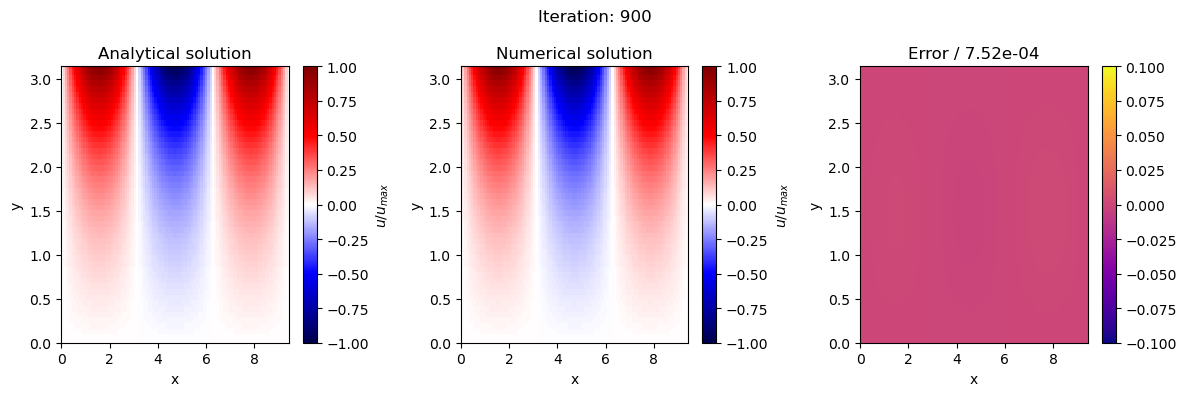

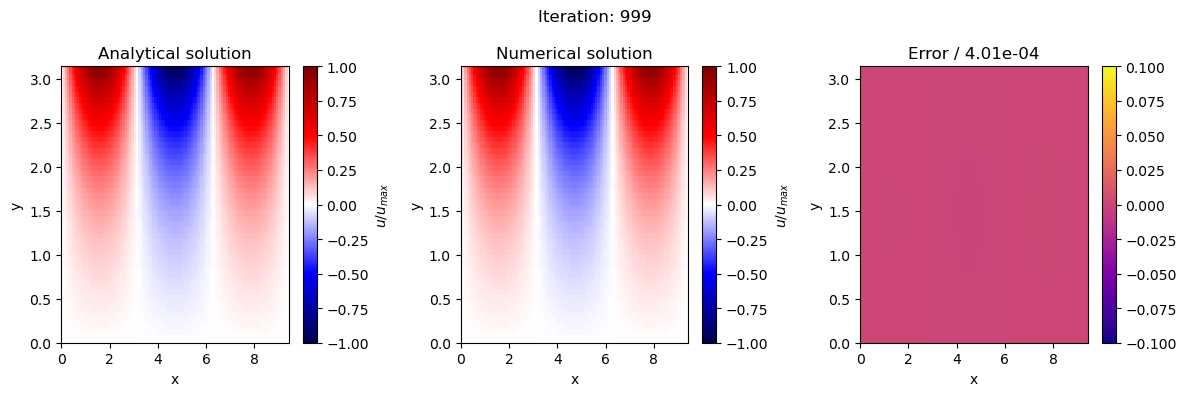

In [ ]:
for idx_tmp in np.arange(len(un_list)+1, step=100):
    idx_tmp = idx_tmp if idx_tmp < len(un_list) else len(un_list) - 1
    un_tmp = un_list[idx_tmp]

    fig = plt.figure(figsize=(12, 4))

    ax = fig.add_subplot(131)
    cf = ax.pcolormesh(x, y, nu_true, cmap='seismic', vmin=-1, vmax=1)
    cbar = fig.colorbar(cf, ax=ax)
    cbar.set_label('$u/u_{max}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    ax.set_title("Analytical solution")

    ax = fig.add_subplot(132)
    nu_tmp = un_tmp/np.max(un_tmp)
    cf = ax.pcolormesh(x, y, nu_tmp, cmap='seismic', vmin=-1, vmax=1)
    cbar = fig.colorbar(cf, ax=ax)
    cbar.set_label('$u/u_{max}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    ax.set_title("Numerical solution")

    ax = fig.add_subplot(133)
    error_map = nu_true - nu_tmp
    cf = ax.pcolormesh(x, y, error_map, cmap='plasma', vmin=-0.1, vmax=0.1)
    cbar = fig.colorbar(cf, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    ax.set_title(f"Error / {np.abs(nu_true - nu_tmp).mean():.2e}")

    fig.suptitle(f"Iteration: {idx_tmp}")
    fig.tight_layout()
    plt.show()

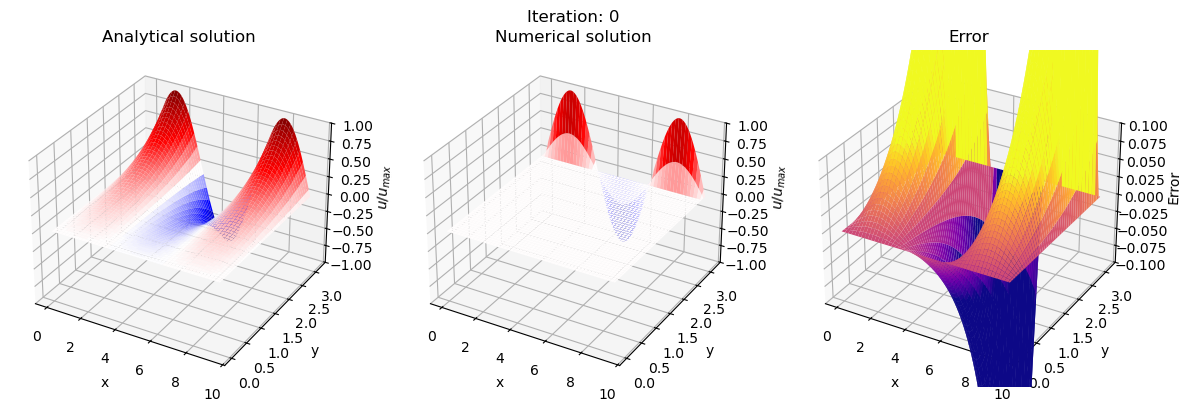

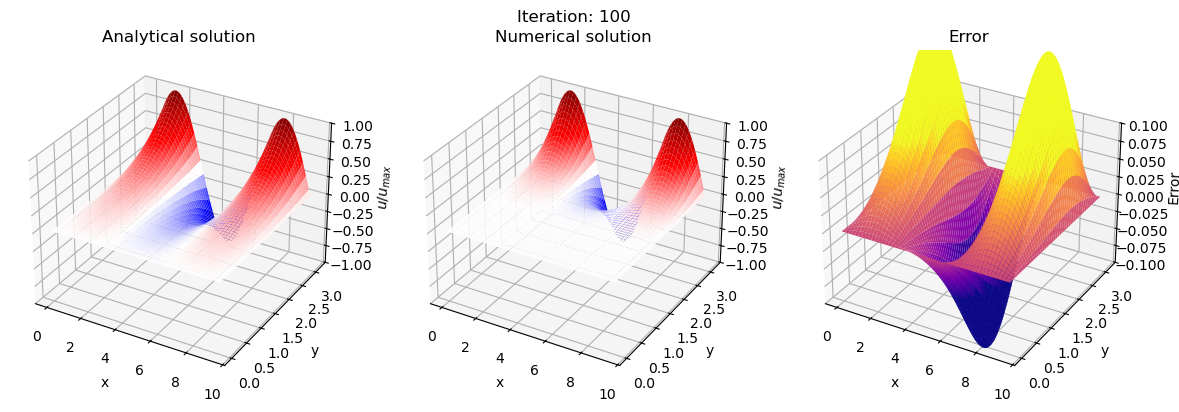

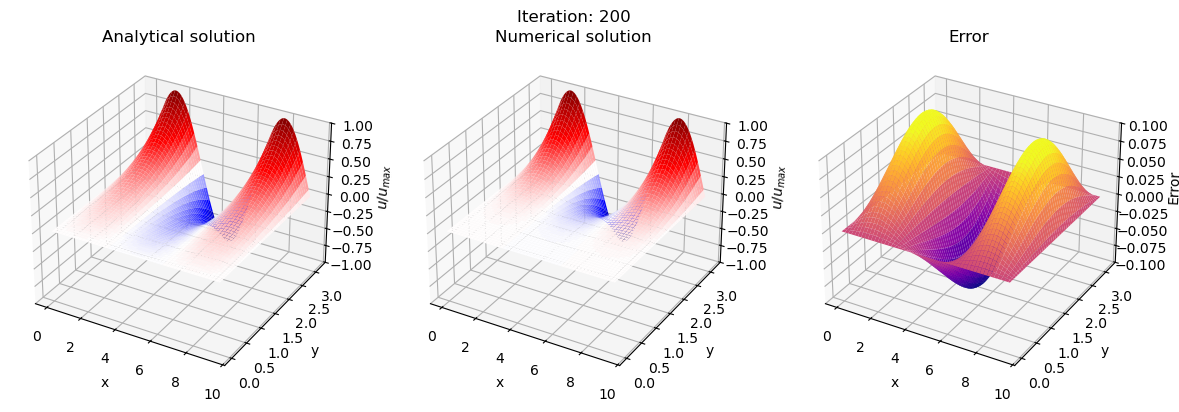

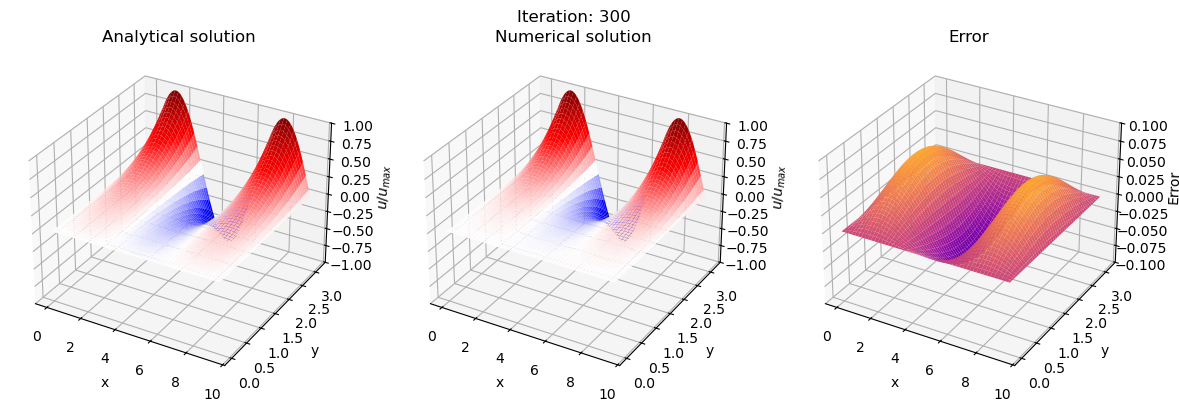

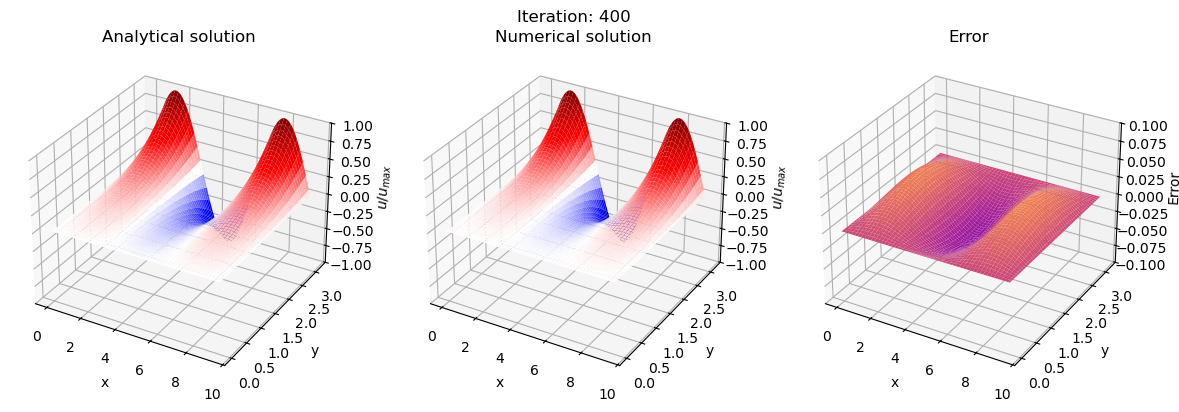

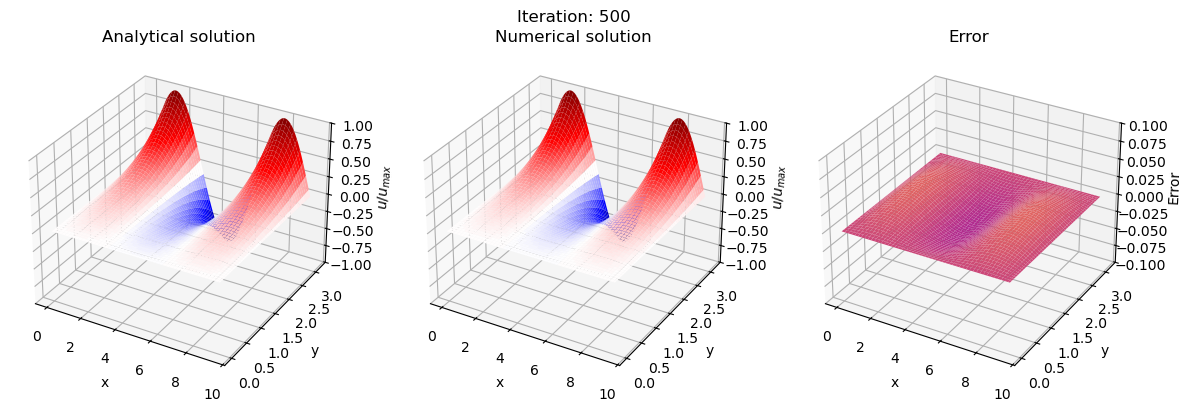

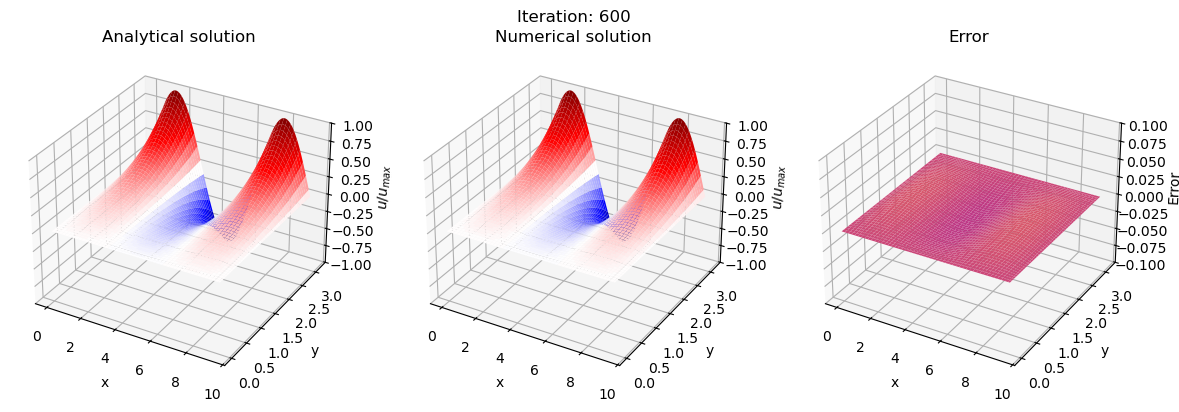

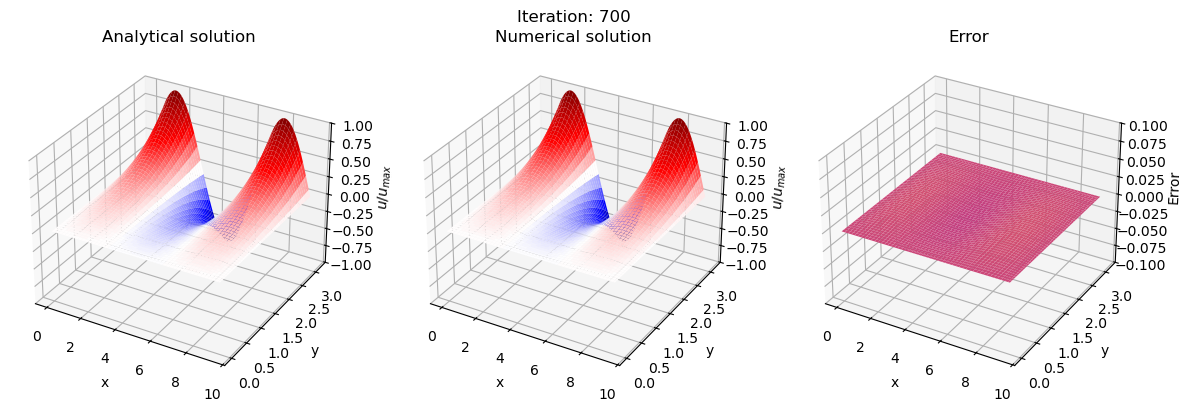

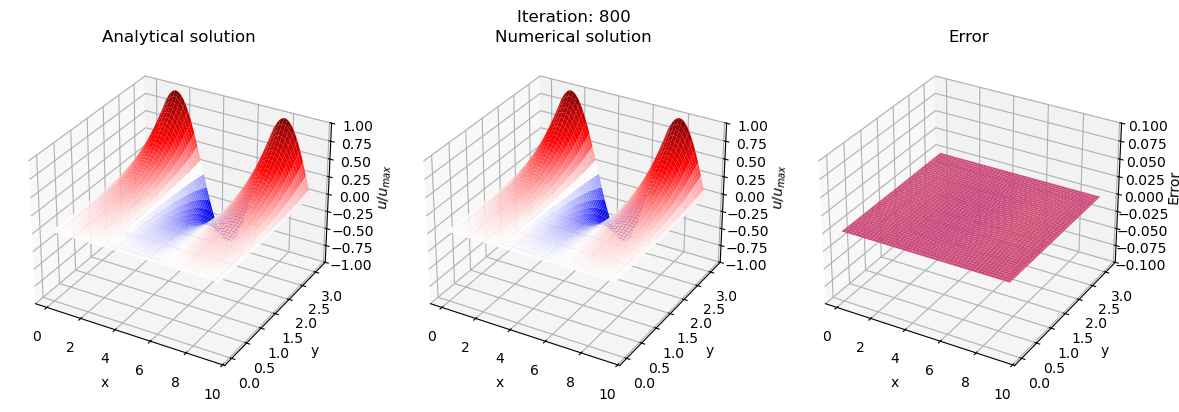

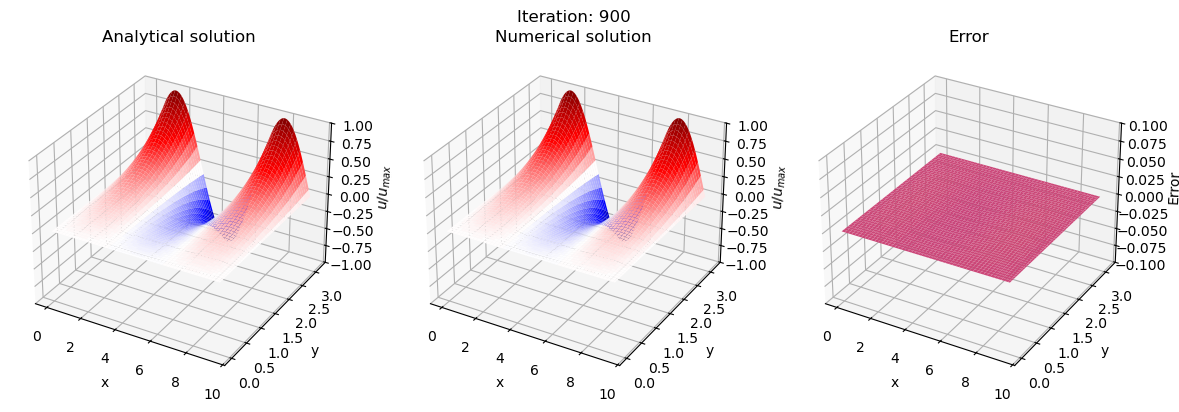

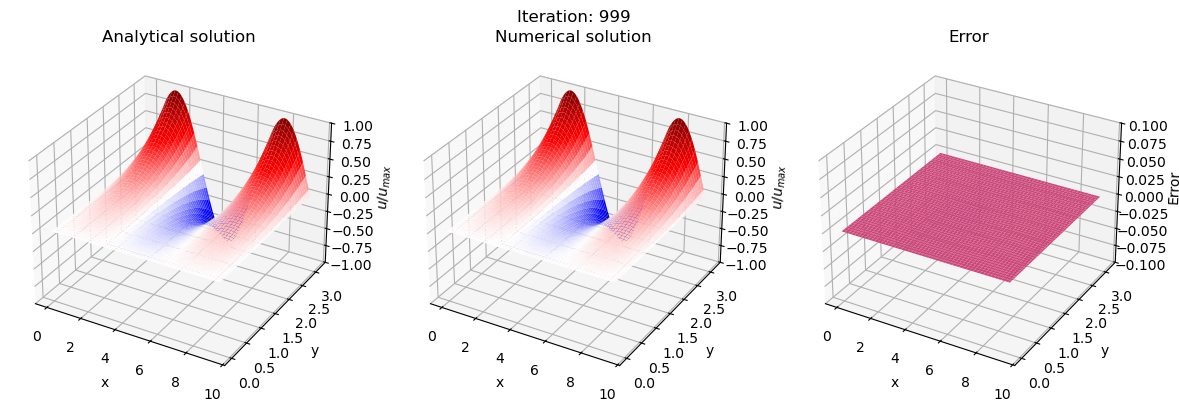

In [ ]:
X, Y = np.meshgrid(x, y)

for idx_tmp in np.arange(len(un_list)+1, step=100):
    idx_tmp = idx_tmp if idx_tmp < len(un_list) else len(un_list) - 1
    un_tmp = un_list[idx_tmp]

    fig = plt.figure(figsize=(12, 4))

    ax = fig.add_subplot(131, projection='3d')
    ax.plot_surface(X, Y, nu_true, cmap='seismic', vmin=-1, vmax=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('$u/u_{max}$')
    ax.set_zlim(-1, 1)
    ax.set_title("Analytical solution")

    ax = fig.add_subplot(132, projection='3d')
    nu_tmp = un_tmp/np.max(un_tmp)
    ax.plot_surface(X, Y, nu_tmp, cmap='seismic', vmin=-1, vmax=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('$u/u_{max}$')
    ax.set_zlim(-1, 1)
    ax.set_title("Numerical solution")

    ax = fig.add_subplot(133, projection='3d')
    error_map = nu_true - nu_tmp
    ax.plot_surface(X, Y, error_map, cmap='plasma', vmin=-0.1, vmax=0.1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Error')
    ax.set_zlim(-0.1, 0.1)
    ax.set_title("Error")

    fig.suptitle(f"Iteration: {idx_tmp}")
    fig.tight_layout()
    plt.show()

In [ ]:
u_pred = un_list[-1]
nu_pred = u_pred/np.max(u_pred)

abs_error = np.abs(nu_true - nu_pred)

print(f"Mean absolute error: {np.mean(abs_error)}")

Mean absolute error: 0.0004012034783249677
